In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import tensorflow.keras
import pickle
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import backend as K

In [2]:
# Check that TF 2.1.0 is in use
print(tf.__version__)

2.1.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

3.   Name two ways to avoid this. [+2 answer, +2 answer]

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]

**2.1 Linear AE points for constructed model, no questions here.**

**2.2 Convolutional AE points for constructed model, no questions here.**

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

***Reminder: Achieve better than 75 anomalies***

In [3]:
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()

# Section 1 - CNN's

In [4]:
from sklearn import preprocessing
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()

data_train=data_train/255
data_test =data_test/255

#Reshape
data_train = data_train.reshape(60000, 28, 28,1)
data_test = data_test.reshape(10000, 28, 28,1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [12]:
#Create and train model architecture
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
img_width, img_height = 28, 28
nb_train_samples = 60000
nb_test_samples = 10000
def CNN_overfit():
    input_shape = (img_width, img_height, 1)

    
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential();
    model.add(Conv2D(256, (3, 3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(100))
    model.add(Dense(10))
    #### Fill in Model ####
    
    return model

In [7]:
#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='mae', optimizer=Adam(lr=0.001), metrics=['accuracy'])
CNN_overfit.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f1e5addea90>>

In [8]:
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1349 - accuracy: 0.6083 - val_loss: 0.1011 - val_accuracy: 0.8341
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0975 - accuracy: 0.8323 - val_loss: 0.0925 - val_accuracy: 0.8503
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0877 - accuracy: 0.8562 - val_loss: 0.0824 - val_accuracy: 0.8901
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0797 - accuracy: 0.9064 - val_loss: 0.0758 - val_accuracy: 0.9255
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0749 - accuracy: 0.9317 - val_loss: 0.0740 - val_accuracy: 0.9441
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0716 - accuracy: 0.9467 - val_loss: 0.0701 - val_accuracy: 0.9529
Epoch 7/10
60000/60000 [==============================]

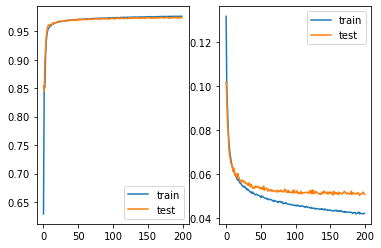

In [59]:
#Plot train/validation loss vs epoch
plt.subplot(121)
plt.plot(history_overfit.history['accuracy']);
plt.plot(history_overfit.history['val_accuracy']);
plt.legend(['train','test']);
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['loss']);
plt.plot(history_overfit.history['val_loss']);
plt.legend(['train','test']);


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). What do you observe for (2)?.

In [9]:
#Create and train model architecture

from tensorflow.keras import backend as K
def CNN_dropout_hidden():
    #### Fill in model ####
    input_shape = (img_width, img_height, 1)
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential();
    model.add(Dropout(0.3,input_shape=input_shape))
    model.add(Conv2D(256, (3, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(100))
    model.add(Dense(10))
    return model

In [10]:
#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='mae', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=10, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1542 - accuracy: 0.4804 - val_loss: 0.1098 - val_accuracy: 0.4765
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1051 - accuracy: 0.7059 - val_loss: 0.1049 - val_accuracy: 0.5629
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1003 - accuracy: 0.7166 - val_loss: 0.1044 - val_accuracy: 0.4694
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0941 - accuracy: 0.7216 - val_loss: 0.1002 - val_accuracy: 0.5877
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0897 - accuracy: 0.7678 - val_loss: 0.0958 - val_accuracy: 0.7131
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0870 - accuracy: 0.7993 - val_loss: 0.0927 - val_accuracy: 0.7111
Epoch 7/10
60000/60000 [==============================] 

In [19]:
#Create and train model architecture
def CNN_dropout_hidden2():
    #### Fill in model ####
    input_shape = (img_width, img_height, 1)
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential();
    model.add(Conv2D(256, (3, 3),input_shape=input_shape,activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3),activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
  #  model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
    return model


CNN_dropout_hidden2 = CNN_dropout_hidden2()
CNN_dropout_hidden2.compile(loss='mae', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history_dropout_hidden2 = CNN_dropout_hidden2.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=10, batch_size=1000, shuffle=True)
scores_dropout_hidden2 = CNN_dropout_hidden2.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden2[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0702 - accuracy: 0.6656 - val_loss: 0.0317 - val_accuracy: 0.8472
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0250 - accuracy: 0.8791 - val_loss: 0.0099 - val_accuracy: 0.9567
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0113 - accuracy: 0.9464 - val_loss: 0.0064 - val_accuracy: 0.9721
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0092 - accuracy: 0.9561 - val_loss: 0.0055 - val_accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0080 - accuracy: 0.9622 - val_loss: 0.0053 - val_accuracy: 0.9765
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0070 - accuracy: 0.9668 - val_loss: 0.0040 - val_accuracy: 0.9814
Epoch 7/10
60000/60000 [==============================]

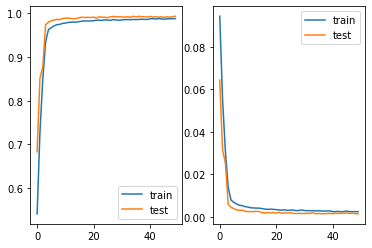

In [101]:
#Plot train/validation loss vs epoch
plt.subplot(121)
plt.plot(history_dropout_hidden2.history['accuracy']);
plt.plot(history_dropout_hidden2.history['val_accuracy']);
plt.legend(['train','test']);
### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden2.history['loss']);
plt.plot(history_dropout_hidden2.history['val_loss']);
plt.legend(['train','test']);

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Train for 150 epochs**

In [9]:
#Reshape training and testing data
#Reshape
#data_train = data_train.reshape(60000, 28, 28,1)
#data_test = data_test.reshape(10000, 28, 28,1)

data_train_reshape_fcae = data_train.reshape(60000,784)
data_test_reshape_fcae = data_test.reshape(10000,784)

In [10]:
# Create autoencoder architecture
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
def deep_ae():
    model = tf.keras.models.Sequential()
    input_img = Input(shape=(784,))
    model.add(Dense(400,activation='sigmoid'))
    model.add(Dense(200,activation='sigmoid'))
    model.add(Dense(100,activation='sigmoid'))
    model.add(Dense(200,activation='sigmoid'))
    model.add(Dense(400,activation='sigmoid'))
    model.add(Dense(784,activation='sigmoid'))
    model(input_img)
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(optimizer='adam', loss='mse')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=10, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0707 - val_loss: 0.0677
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0621 - val_loss: 0.0590
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0556 - val_loss: 0.0522
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0499 - val_loss: 0.0467
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0448 - val_loss: 0.0425
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0407 - val_loss: 0.0383
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0372 - val_loss: 0.0360
Epoch 8/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0350 - val_loss: 0.0335
Epoch 9/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0325 - val_

dict_keys(['loss', 'val_loss'])


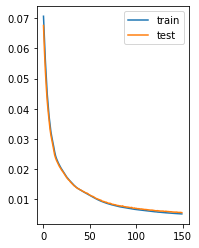

In [31]:
#Plot train/validation loss vs epoch
print(history_deep_ae.history.keys())
# plt.subplot(121)
# plt.plot(history_deep_ae.history['accuracy']);
# plt.plot(history_deep_ae.history['val_accuracy']);
# plt.legend(['train','test']);
# ### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_deep_ae.history['loss']);
plt.plot(history_deep_ae.history['val_loss']);
plt.legend(['train','test']);
#### Fill in plot #####

In [32]:
deep_ae_hl.shape

(10000, 100)

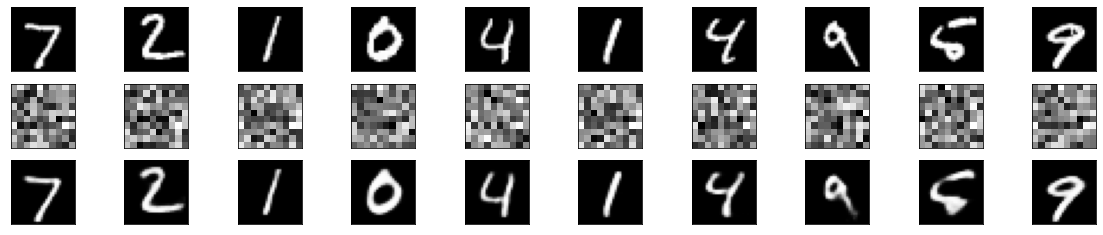

In [33]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**All experiments with dropout set at 30%. Train for 200 epochs**

In [36]:
print(data_train.shape)

(60000, 28, 28, 1)


In [5]:
#Reshape data to account for grayscale channel in each image
#data_train = data_train.reshape(60000, 28, 28,1)
#data_test = data_test.reshape(10000, 28, 28,1)
data_train_reshape_cae = data_train.reshape(60000, 28, 28,1)
data_test_reshape_cae = data_test.reshape(10000, 28, 28,1)

In [6]:
#Create Convolutional AutoEncoder Architecture
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
def cae():
    
    model = tf.keras.models.Sequential()

    model.add( Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
    #### Fill in model ####
    model(input_img)
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='mse', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=10, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1

dict_keys(['loss', 'val_loss'])


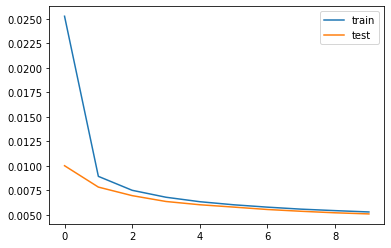

In [7]:
#Plot train/validation loss vs epoch
#Plot train/validation loss vs epoch
print(history_conv_ae.history.keys())

#### Fill in plot ####
#Plot loss vs epoch

plt.plot(history_conv_ae.history['loss']);
plt.plot(history_conv_ae.history['val_loss']);
plt.legend(['train','test']);
#### Fill in plot #####

<Figure size 432x288 with 0 Axes>

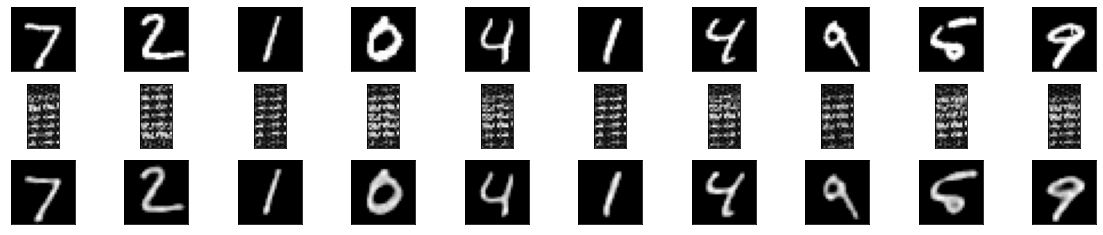

In [8]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

At this point you have enough starter code to 
Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [3]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

#### Example spectrograms

ex_norm  (8, 64, 313)
ex_anom  (8, 64, 313)


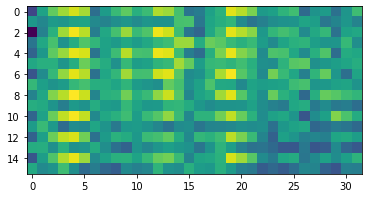

In [4]:
#### Load melspectrograms
#ex_norm  = np.load('./data/ex_normalspec.npy')
#ex_anom = np.load('./data/ex_abnormspec.npy')
ex_norm  = np.load('/datasets/home/21/321/ee228sp20ta1/Anomaly/ex_normalspec.npy')
ex_anom = np.load('/datasets/home/21/321/ee228sp20ta1/Anomaly/ex_abnormspec.npy')
print("ex_norm ",ex_norm.shape)
print("ex_anom ",ex_anom.shape)
plt.imshow(ex_anom[:,:,0].reshape(16, 32));

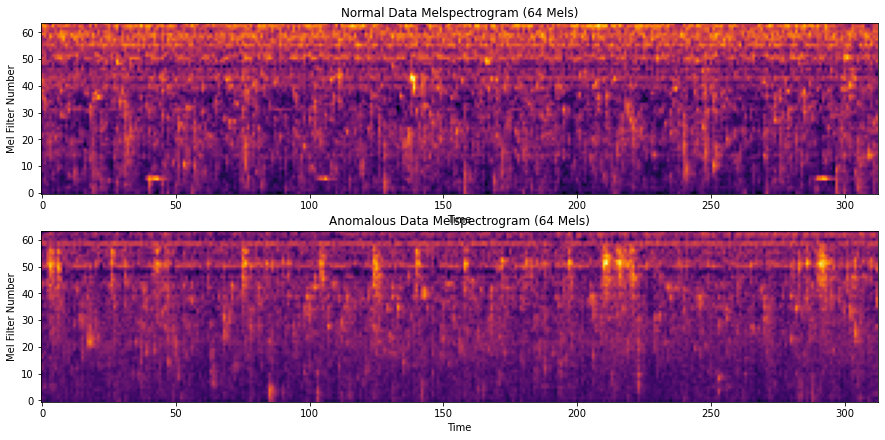

In [5]:
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

#### General template, up to this point, for constructing your deep learning model 
1. Set up the data (reshape, scale, etc...
2. Initialize a loss function
3. Compile a model
4. Train a model

In [14]:
#### Create your own Baseline autoencoder
# Model name is fixed for use by later code
from tensorflow.keras import layers
input_img = Input(shape=(64,312,1))  # adapt this if using `channels_first` image data format
def autoencoderBASE():
    
    model = tf.keras.models.Sequential()

    model.add( Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    model(input_img)
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
autoencoderBASE = autoencoderBASE()
print(autoencoderBASE.summary())




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 312, 16)       160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 156, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 156, 8)        1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 78, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 78, 8)         584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 156, 8)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 156, 16)      

In [15]:
# Load data
#x_train = np.load('./data/training_data.npy')
#test = np.load('./data/test_data.npy')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

x_train = np.load('/datasets/home/21/321/ee228sp20ta1/Anomaly/training_data.npy')

x_test = np.load('/datasets/home/21/321/ee228sp20ta1/Anomaly/test_data.npy')



X_train, X_valid = train_test_split(x_train[:1000],
                                   train_size=0.8,
                                   random_state=42,
                                   shuffle=True)

x_train = X_train[:,0,:,:312].copy()
x_train = x_train.reshape((800*64,312))

x_valid = X_valid[:,0,:,:312].copy()
x_valid = x_valid.reshape((200*64,312))

x_test  = x_test[:,0,:,:312].copy()
x_test  = x_test.reshape((143*64,312))


scaler = MinMaxScaler().fit(x_train) 
scaled_train = scaler.transform(x_train)
scaled_valid = scaler.transform(x_valid)
scaled_test  = scaler.transform(x_test)

someTrainData=scaled_train.reshape(800,64,312,1)
someValidData=scaled_valid.reshape(200,64,312,1)
someTestData=scaled_test.reshape(143,64,312,1)

In [16]:
print(autoencoderBASE.summary())
autoencoderBASE.compile(loss='mse', optimizer='adam')
history_Base_ae = autoencoderBASE.fit(someTrainData, someTrainData, validation_data=(someValidData, someValidData), epochs=10, batch_size=250, shuffle=True)
decoded_Base_data = autoencoderBASE.predict(someValidData)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 312, 16)       160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 156, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 156, 8)        1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 78, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 78, 8)         584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 156, 8)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 156, 16)      

In [17]:
#Obtain encoder representation of data
get_hl = K.function([autoencoderBASE.layers[0].input], [autoencoderBASE.layers[3].output])
conv_ae_hl = get_hl([someTestData])[0]

<class 'numpy.ndarray'>


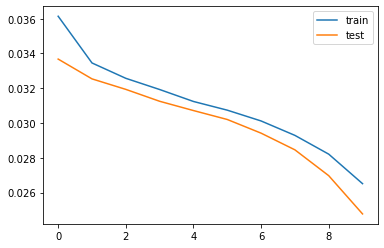

In [20]:
# Plot loss versus epoch.

print(type(decoded_Base_data))
plt.plot(history_Base_ae.history['loss']);
plt.plot(history_Base_ae.history['val_loss']);
plt.legend(['train','test']);

In [7]:
######### This code should remain untouched as much as possible,
#### except where your variable names for loss function or data set are needed.
#### This code feeds your data through the trained network to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
#### lossFunction <- Your loss function's name or use this one. Your choice of loss function.
##############################################################################################
norm_list = []
lossMSE = tf.keras.losses.MeanSquaredError()
#np.concatenate((data_train_reshape_base,data_test_reshape_base))
dataset = (tf.data.Dataset.from_tensor_slices(someTrainData))
for i, instance in dataset.enumerate():
    instance=tf.reshape(instance,[1,64,312,1])
    ae_predictions = autoencoderBASE(instance).numpy()
    norm_list.append(lossMSE(instance,ae_predictions))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [8]:
# Feed the anomaly data through to get its error
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(someTestData))
autoencoderBASE.compile(loss='mean_squared_error', optimizer='adam')
for i, instance in anomset.enumerate():
    instance=tf.reshape(instance,[1,64,312,1])
    ae_predictions = autoencoderBASE(instance).numpy()
    anom_list.append(lossMSE(instance,ae_predictions))
    

The mean of normal data is 0.0094        and standard deviation is 0.0006


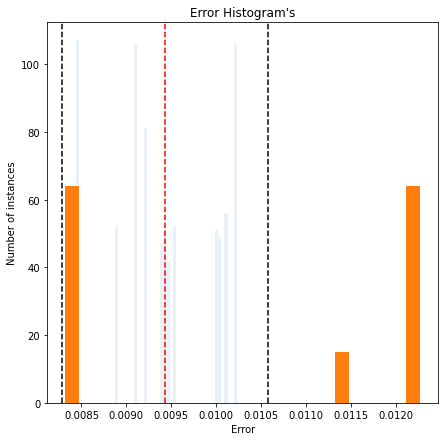

In [9]:
normal_data_ERRORs = np.array(norm_list)# the norm list is from train data, train data error, 
abnormal_data_ERRORs = np.array(anom_list) # the anom list is from test data, test data error
######################### Code for presenting true positives to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_ERRORs.mean()
std = normal_data_ERRORs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Error Histogram\'s')
plt.hist(normal_data_ERRORs, bins=50, alpha=0.1)
plt.hist(abnormal_data_ERRORs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('Error')
plt.ylabel('Number of instances')
plt.show()

In [11]:
tp_count = np.sum(abnormal_data_ERRORs >= upperbound) +\
           np.sum(abnormal_data_ERRORs <= lowerbound)      
fn_count = someTestData.shape[0] - tp_count
fp_count = np.sum(normal_data_ERRORs >= upperbound)+\
           np.sum(normal_data_ERRORs <= lowerbound)        
tn_count = 1000 - fp_count

print(f'TP {tp_count} \t FP {fp_count}')
print(f'FN {fn_count} \t TN {tn_count}')

TP 79 	 FP 0
FN 64 	 TN 1000
